<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.


#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [ ]:
%pip install pandas==2.2.2
%pip install numpy==1.26.4
%pip install matplotlib==3.8.0
%pip install scikit-learn==1.5.0
%pip install torch==2.3.1
%pip install ucimlrepo==0.0.7

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

data = pd.read_csv("league_of_legends_data_large.csv")
display(data.head())

# Separate features and target
X = data.drop('win', axis=1)
y = data['win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float).unsqueeze(1)

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
2.Initialize the Model, Loss Function, and Optimizer:</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [17]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    
    def __init__(self, n_input):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(n_input, 1)
        
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

model = LogisticRegressionModel(X_train.shape[1])

criterion = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop

3. Print Loss Every 100 Epochs
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation

5. Calculate Accuracy
   
6. Print Accuracy

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [ ]:
epochs = 1000
for epoch in range(epochs):
    #Training phase
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss =  criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Training phase, epoch: {epoch}, loss: {loss}")
#Evaluation phase
model.eval()
with torch.no_grad():
    #Training accurancy
    yhat_train = model(X_train)
    yhat_train = (yhat_train > 0.5).long() 
    correct = (yhat_train == y_train).sum().item()  #count the correct predictions
    accuracy_train = correct / y_train.size(0) * 100   
    #Test accurancy
    yhat_test = model(X_test)
    yhat_test = (yhat_test > 0.5).long() 
    correct = (yhat_test == y_test).sum().item()  #count the correct predictions
    accuracy_test = correct / y_test.size(0) * 100   

    print(f"final training accuracy: {accuracy_train:.2f}%, Final test accuracy: {accuracy_test:.2f}%")
    

Training phase, epoch: 0, loss: 0.747189462184906
Training phase, epoch: 100, loss: 0.7277068495750427
Training phase, epoch: 200, loss: 0.7146632671356201
Training phase, epoch: 300, loss: 0.706084668636322
Training phase, epoch: 400, loss: 0.7005035877227783
Training phase, epoch: 500, loss: 0.6968937516212463
Training phase, epoch: 600, loss: 0.6945648193359375
Training phase, epoch: 700, loss: 0.6930628418922424
Training phase, epoch: 800, loss: 0.6920934319496155
Training phase, epoch: 900, loss: 0.691466748714447
final training accuracy: 51.75%, Final test accuracy: 53.00%


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:

2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [ ]:
model_l2 = LogisticRegressionModel(X_train.shape[1])
optimizer_l2 = torch.optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.01)
epochs = 1000
for epoch in range(epochs):
    #Training phase
    model_l2.train()
    optimizer_l2.zero_grad()
    outputs = model_l2(X_train)
    loss =  criterion(outputs, y_train)
    loss.backward()
    optimizer_l2.step()
    if epoch % 100 == 0:
        print(f"Training phase, epoch: {epoch}, loss: {loss}")
#Evaluation phase
model_l2.eval()
with torch.no_grad():
    #Training accurancy
    yhat_train_l2 = model_l2(X_train)
    yhat_train_l2 = (yhat_train_l2 > 0.5).long() 
    correct = (yhat_train_l2 == y_train).sum().item()  #count the correct predictions
    accuracy_train = correct / y_train.size(0) * 100   
    #Test accurancy
    yhat_test_l2 = model_l2(X_test)
    yhat_test_l2 = (yhat_test_l2 > 0.5).long() 
    correct = (yhat_test_l2 == y_test).sum().item()  #count the correct predictions
    accuracy_test = correct / y_test.size(0) * 100   
    print(f"Training accuracy with L2: {accuracy_train:.2f}%, Test accuracy with L2: {accuracy_test:.2f}%")

Training phase, epoch: 0, loss: 0.7544626593589783
Training phase, epoch: 100, loss: 0.7295383214950562
Training phase, epoch: 200, loss: 0.713921070098877
Training phase, epoch: 300, loss: 0.7044029235839844
Training phase, epoch: 400, loss: 0.6986957788467407
Training phase, epoch: 500, loss: 0.695301353931427
Training phase, epoch: 600, loss: 0.6932880282402039
Training phase, epoch: 700, loss: 0.6920936107635498
Training phase, epoch: 800, loss: 0.6913831830024719
Training phase, epoch: 900, loss: 0.6909593343734741
Training accuracy with L2: 52.75%, Test accuracy with L2: 54.50%


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


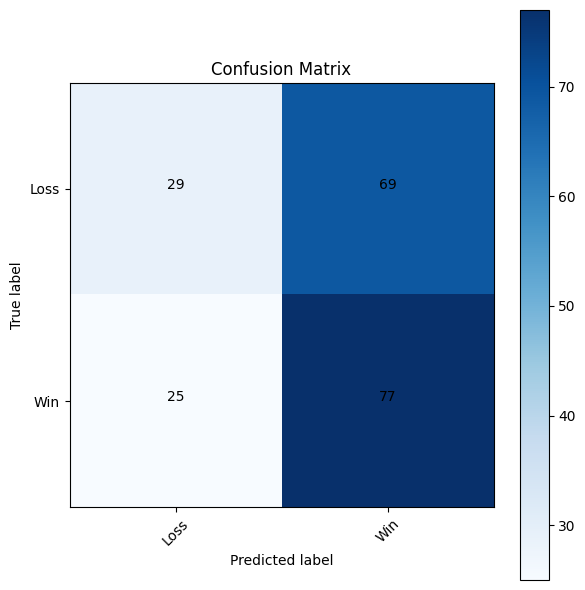

Classification Report:
               precision    recall  f1-score   support

        Loss       0.54      0.30      0.38        98
         Win       0.53      0.75      0.62       102

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.50       200
weighted avg       0.53      0.53      0.50       200



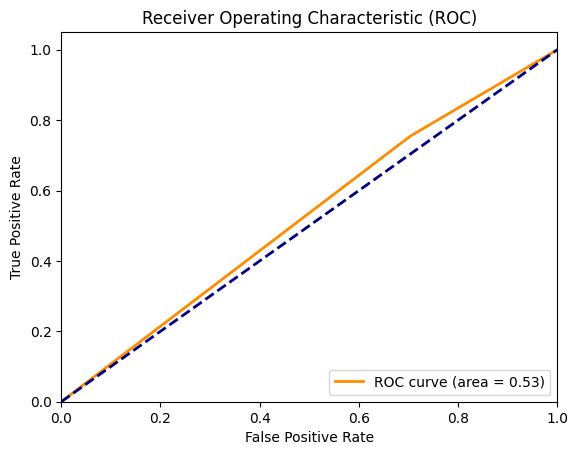

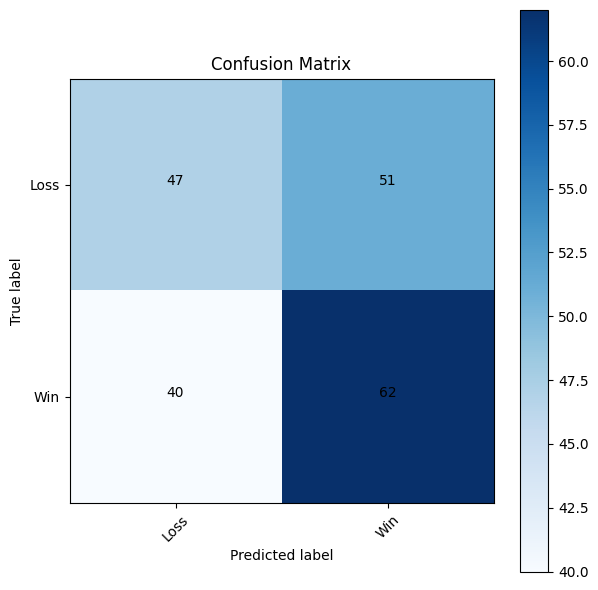

Classification Report:
               precision    recall  f1-score   support

        Loss       0.54      0.48      0.51        98
         Win       0.55      0.61      0.58       102

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.55      0.54       200



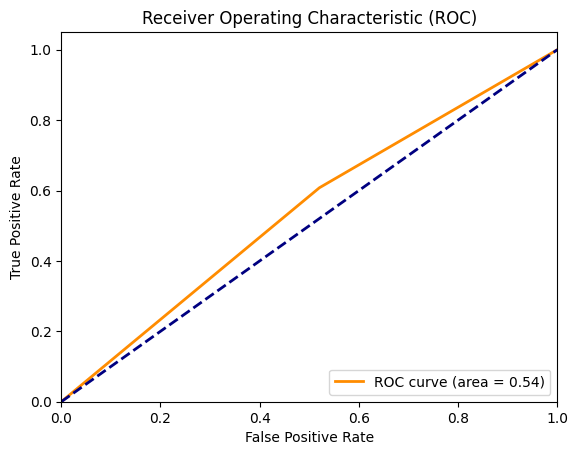

In [26]:
import matplotlib.pyplot as plt, itertools
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def plot_confusion_roc(y,yhat):
    cm = confusion_matrix(y,yhat)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(2)
    plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
    plt.yticks(tick_marks, ['Loss', 'Win'])
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="black" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    # Print classification report
    print("Classification Report:\n", classification_report(y, yhat, target_names=['Loss', 'Win']))
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y, yhat)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
plot_confusion_roc(y_test,yhat_test)
plot_confusion_roc(y_test,yhat_test_l2)


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [28]:
# Save the model
torch.save(model.state_dict(), 'final_project_league_of_lengends_match.pth')

# Load the model
model = LogisticRegressionModel(X_test.shape[1])
model.load_state_dict(torch.load('final_project_league_of_lengends_match.pth'))

# Ensure the loaded model is in evaluation mode
model.eval()

# Evaluate the loaded model
torch.no_grad()

#Test accurancy
yhat_test = model(X_test)
yhat_test = (yhat_test > 0.5).long() 
correct = (yhat_test == y_test).sum().item()  #count the correct predictions
accuracy_test = correct / y_test.size(0) * 100   

print(f"Test accuracy: {accuracy_test:.2f}%")


Test accuracy: 53.00%


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [ ]:
learning_rates = [0.01, 0.05, 0.1]
epochs = 1000
accuracy_test = []
accuracy_train = []
criterion = nn.BCELoss()
for learning_rate in learning_rates:

    model = LogisticRegressionModel(X_train.shape[1])
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):

        #Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss =  criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
    #Evaluation phase
    model.eval()
    with torch.no_grad():
        #Training accurancy
        yhat_train = model(X_train)
        yhat_train = (yhat_train > 0.5).long() 
        correct_train = (yhat_train == y_train).sum().item()  #count the correct predictions
        #Test accurancy
        yhat_test = model(X_test)
        yhat_test = (yhat_test > 0.5).long() 
        correct_test = (yhat_test == y_test).sum().item()  #count the correct predictions 
        accuracy_train.append([learning_rate, round(correct_train / y_train.size(0) * 100,2)])  
        accuracy_test.append([learning_rate, round(correct_test / y_test.size(0) * 100,2)])  
print(f"Train accuracy: {accuracy_train} \nTest accuracy: {accuracy_test}",flush=True, end="\n")
max_accuracy_test = max(accuracy_test, key=lambda x: x[1])
print(f"Max Accuracy --> Learning rate: {max_accuracy_test[0]}, Accuracy: {max_accuracy_test[1]}%")

Train accuracy: [[0.01, 52.5], [0.05, 52.25], [0.1, 52.25]] 
Test accuracy: [[0.01, 54.0], [0.05, 53.5], [0.1, 53.5]]
Max Accuracy --> Learning rate: 0.01, Accuracy: 54.0%


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


        Feature  Importance
5  wards_placed    0.081847
3   gold_earned    0.063432
0         kills    0.056234
2       assists    0.001318
6  wards_killed   -0.003879
4            cs   -0.009868
1        deaths   -0.014273
7  damage_dealt   -0.082235


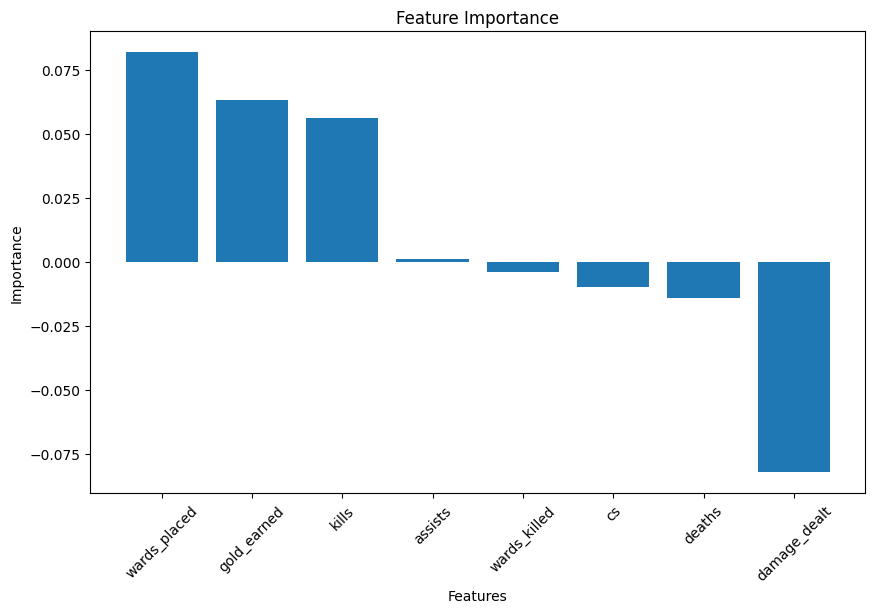

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Extract the weights of the linear layer
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Plot featureimportance 
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
